# Final Project - House Sales in King County, USA

## Instructions

<p>In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. Your job is to complete the ten questions. Some hints to the questions are given.</p>
<p>As you are completing this notebook, take and save the screenshots of the final outputs of your solutions such as final charts, tables, calculation results and so on. They will need to be shared in the following Peer Review section of the Final Project module.</p>

## About the Dataset

<p>This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from <a href="https://www.kaggle.com/datasets/harlfoxem/housesalesprediction">here</a>. It was also slightly modified for the purposes of this course.</p>

<table style="border-collapse: collapse; border: 1px solid; text-align: center;">
    <thead>
    <tr>
        <th style="border: 1px solid; text-align: left;">Variable</th>
        <th style="border: 1px solid; text-align: left;">Description</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="border: 1px solid; text-align: left;">id</td>
        <td style="border: 1px solid; text-align: left;">A notation for a house</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">date</td>
        <td style="border: 1px solid; text-align: left;">Date house was sold</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">price</td>
        <td style="border: 1px solid; text-align: left;">Price is prediction target</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">bedrooms</td>
        <td style="border: 1px solid; text-align: left;">Number of bedrooms</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">bathrooms</td>
        <td style="border: 1px solid; text-align: left;">Number of bathrooms</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">sqft_living</td>
        <td style="border: 1px solid; text-align: left;">Square footage of the home</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">sqft_lot</td>
        <td style="border: 1px solid; text-align: left;">Square footage of the lot</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">floors</td>
        <td style="border: 1px solid; text-align: left;">Total floors (levels) in house</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">waterfront</td>
        <td style="border: 1px solid; text-align: left;">House which has a view to a waterfront</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">view</td>
        <td style="border: 1px solid; text-align: left;">Has been viewed</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">condition</td>
        <td style="border: 1px solid; text-align: left;">How good the condition is overall</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">grade</td>
        <td style="border: 1px solid; text-align: left;">Overall grade given to the housing unit, based on King County grading system</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">sqft_above</td>
        <td style="border: 1px solid; text-align: left;">Square footage of house apart from basement</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">sqft_basement</td>
        <td style="border: 1px solid; text-align: left;">Square footage of the basement</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">yr_built</td>
        <td style="border: 1px solid; text-align: left;">Built Year</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">yr_renovated</td>
        <td style="border: 1px solid; text-align: left;">Year when house was renovated</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">zipcode</td>
        <td style="border: 1px solid; text-align: left;">Zip code</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">lat</td>
        <td style="border: 1px solid; text-align: left;">Latitude coordinate</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">long</td>
        <td style="border: 1px solid; text-align: left;">Longitude coordinate</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">sqft_living15</td>
        <td style="border: 1px solid; text-align: left;">Living room area in 2015 (implies - some renovations) This might or might not have affected the lotsize area</td>
    </tr>
    <tr>
        <td style="border: 1px solid; text-align: left;">sqft_lot15</td>
        <td style="border: 1px solid; text-align: left;">Lotsize area in 2015 (implies - some renovations)</td>
    </tr>
    </tbody>
</table>

### Import the required libraries

In [1]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

## Module 1 - Importing Datasets

<p>Download the dataset by running the cell below.</p>

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
filename = download_file(data_url)

Downloading: 39.22% (1048576 / 2673776 bytes)
Downloading: 78.43% (2097152 / 2673776 bytes)
Downloading: 100.00% (2673776 / 2673776 bytes)
Download Complete.


<p>Load the csv.</p>

In [4]:
df = pd.read_csv(filename)

<p>We use the method <code>dataframe.head()</code> to display the first 5 columns of the dataframe.</p>

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

<p>Display the data types of each column using the function <code>dtypes</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.</p>

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<p>We use the method <code>discribe()</code> to obtain a statistical summary of the dataframe.</p>

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Module 2 - Data Wrangling

### Question 2

<p>Drop the columns <code>id</code> and <code>Unnamed: 0</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.</p>

In [8]:
df = df.drop(["id", "Unnamed: 0"], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<p>We can see we have missing values for the columns <code>bedrooms</code> and <code>bathrooms</code>.</p>

In [9]:
print(f"The number of NaN values for the column bedrooms: {df["bedrooms"].isnull().sum()}")
print(f"The number of NaN values for the column bathrooms: {df["bathrooms"].isnull().sum()}")

The number of NaN values for the column bedrooms: 13
The number of NaN values for the column bathrooms: 10


<p>We can replace the missing values of the column <code>bedrooms</code> with the mean of the column <code>bedrooms</code> using the method <code>replace()</code>.</p>

In [10]:
mean_bedrooms = df["bedrooms"].mean()
df["bedrooms"] = df["bedrooms"].replace(np.nan, mean_bedrooms)

<p>We also replace the missing values of the column <code>bathrooms</code> with the mean of the column <code>bathrooms</code> using the method <code>replace()</code>.</p>

In [11]:
mean_bathrooms = df["bathrooms"].mean()
df["bathrooms"] = df["bathrooms"].replace(np.nan, mean_bathrooms)

In [12]:
print(f"The number of NaN values for the column bedrooms: {df["bedrooms"].isnull().sum()}")
print(f"The number of NaN values for the column bathrooms: {df["bathrooms"].isnull().sum()}")

The number of NaN values for the column bedrooms: 0
The number of NaN values for the column bathrooms: 0


## Module 3 - Exploratory Data Analysis (EDA)

### Question 3

<p>Use the method <code>value_counts()</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a <code>pandas.DataFrame</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.</p>

In [13]:
df["floors"].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

<p>Use the function <code>boxplot()</code> in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more <code>price</code> outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.</p>

<Axes: xlabel='waterfront', ylabel='price'>

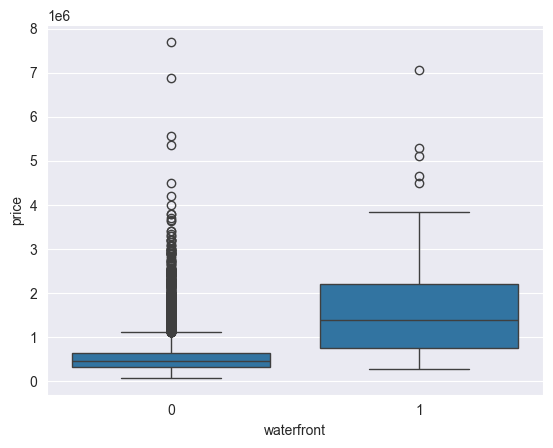

In [14]:
sns.boxplot(x="waterfront", y="price", data=df)

### Question 5

<p>Use the function <code>regplot()</code> in the seaborn library to determine if the feature <code>sqft_above</code> is negatively or positively correlated with <code>price</code>. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.</p>

<Axes: xlabel='sqft_above', ylabel='price'>

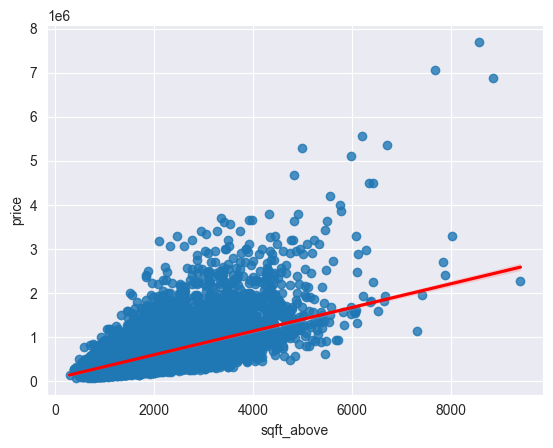

In [15]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})

<p>We can use the <code>pandas</code> method <code>corr()</code> to find the feature other than <code>price</code> that is most correlated with <code>price</code>.</p>

In [16]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()["price"].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Module 4 - Model Development

<p>We can Fit a Linear Regression model using the longitute feature <code>long</code> and calculate the $R^2$.</p>

In [17]:
x = df[["long"]]
y = df["price"]

lm = LinearRegression()
lm.fit(x, y)
lm.score(x, y)

0.0004676943014898516

### Question 6

<p>Fit a Linear Regression model to predict the <code>price</code> using the feature <code>sqft_living</code> then calculate the $R^2$. Take a screenshot of your code and the value of the $R^2$. You will need to submit it for the final project.</p>

In [18]:
x = df[["sqft_living"]]
y = df["price"]

lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

0.4928532179037931

### Question 7

<p>Fit a Linear Regression model to predict the <code>price</code> using the list of features:</p>

In [19]:
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

<p>Then calculate the $R^2$. Take a screenshot of your code and the value of the $R^2$. You will need to submit it for the final project.</p>

In [20]:
z = df[features]
lr_1 = LinearRegression()
lr_1.fit(z, y)
lr_1.score(z, y)

0.6576951666037499

### This will help with Question8

<p>Create a list of tuples, the first element in the tuple contains the name of the estimator: <code>scale</code>, <code>polynomial</code> and <code>model</code>. The second element in the tuple contains the model constructor: <code>StandardScaler()</code>, <code>PolynomialFeatures(include_bias=False)</code> and <code>LinearRegression()</code>.</p>

In [21]:
input_ = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]

### Question 8

<p>Use the list to create a pipeline object to predict the <code>price</code>, fit the object using the features in the list <code>features</code>, and calculate the $R^2$. Take a screenshot of your code and the value of the $R^2$. You will need to submit it for the final project.</p>

In [22]:
pipe = Pipeline(input_)
pipe.fit(z, y)
pipe.score(z, y)

0.7513408515988734

## Module 5 - Model Evaluation and Refinement

<p>We will split the data into training and testing sets.</p>

In [23]:
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.15, random_state=0)

print(f"The number of test samples: {x_test.shape[0]}")
print(f"The number of training samples: {x_train.shape[0]}")

The number of test samples: 3242
The number of training samples: 18371


### Question 9

<p>Create and fit a Ridge Regression object using the training data, set the regularization parameter to 0.1, and calculate the $R^2$ using the test data. Take a screenshot of your code and the value of the $R^2$. You will need to submit it for the final project.</p>

In [24]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)

0.6484640309561597

### Question 10

<p>Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge Regression object using the training data, set the regularisation parameter to 0.1, and calculate the $R^2$ utilising the test data provided. Take a screenshot of your code and the $R^2$. You will need to submit it for the final project.</p>

In [25]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

ridge_model_1 = Ridge(alpha=0.1)
ridge_model_1.fit(x_train_pr, y_train)
ridge_model_1.score(x_test_pr, y_test)

0.7164618254488316

****
This is the end of the file.
****